In [1]:
import pandas as pd
import numpy as np
import numpy_financial as npf
from datetime import date
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Create a data frame with a range of discount rates
dfi = pd.DataFrame(data=list(range(0,45,1)) , columns=['discount_rate'])

print(dfi.head())
print(dfi.tail())

   discount_rate
0              0
1              1
2              2
3              3
4              4
    discount_rate
40             40
41             41
42             42
43             43
44             44


In [3]:
# Create a function for calculating NPV
def Npv(r):
    return npf.npv(r*0.01, cash_flows)

In [4]:
cash_flows = [-145, 100, 100, 100, 100, -275]
#cash_flows = [110, -121]
#cash_flows = [-120000, 30000, 60000, 50000, 40000, 180000]
#cash_flows = [-1000, 73.75, 73.75, 73.75, 73.75, 1073.75]
#cash_flows = [-500, 30,50,-10,20,-5]

Npv(10)
print("NPV: ${}".format(round(Npv(7.375),2)))

NPV: $-1.8


In [5]:
dfi['NPV'] = dfi['discount_rate'].apply(Npv)
print(dfi.head())

   discount_rate        NPV
0              0 -20.000000
1              1 -16.456509
2              2 -13.303103
3              3 -10.507575
4              4  -8.040432


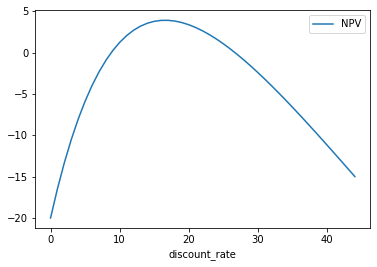

In [6]:
ax = dfi.set_index('discount_rate').plot()

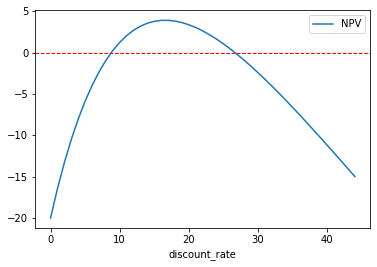

In [7]:
# Same, but with a fancy line at zero
ax = dfi.set_index('discount_rate').plot()
ax.axhline(y=0, xmin=dfi['discount_rate'].min(), xmax=dfi['discount_rate'].max(), color='r', linestyle='--', lw=1)

In [8]:
# Calculate IRR
irr = round(npf.irr(cash_flows)*100, 5)
irr

8.78283

Based on the IRR formula, IRR is about 8.78283 percent


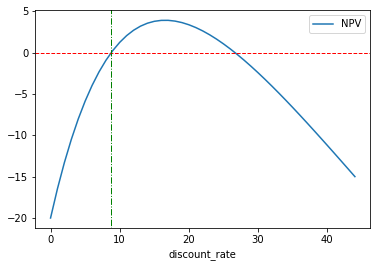

In [10]:
ax = dfi.set_index('discount_rate').plot()
ax.axhline(y=0,   xmin=dfi['discount_rate'].min(), xmax=dfi['discount_rate'].max(), color='r', linestyle='--', lw=1)
ax.axvline(x=irr, ymin=dfi['NPV'].min(),           ymax=dfi['NPV'].max(),           color='g', linestyle='-.', lw=1)
print("Based on the IRR formula, IRR is about {} percent".format(irr))

In [ ]:
print(dfi.head())
print(dfi.tail())

In [ ]:
print("Based on the data frame, IRR is about {} percent".format(abs(dfi).idxmin()[0]))